In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)

In [2]:
from sklearn.linear_model import LinearRegression, Lasso #l2 regularization
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


EDA
1. Explore missing vals
2. Explore numeric and categorical attributes, and their distributions
3. Using Linear Regression, we'll check for independence, linearity, normality of data 

In [7]:
data.isnull().sum().sum()

0

In [8]:
num_cols = [each for each in data.columns if data[each].dtypes != 'object']
print(num_cols)

cat_cols = [each for each in data.columns if data[each].dtypes == 'object']
cat_cols

['age', 'bmi', 'children', 'charges']


['sex', 'smoker', 'region']

In [9]:
#numeric values distinct value count
for each in num_cols:
    print(f"{each} :--> {len(data[each].unique())}")

age :--> 47
bmi :--> 548
children :--> 6
charges :--> 1337


C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


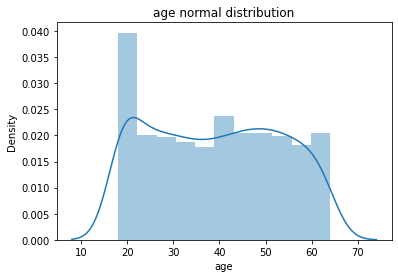

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


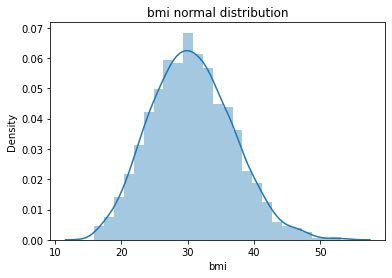

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


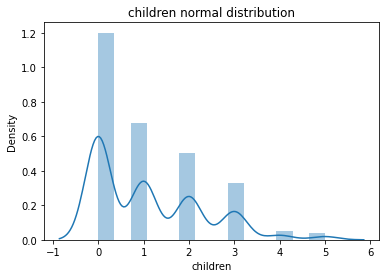

C:\Users\santa\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


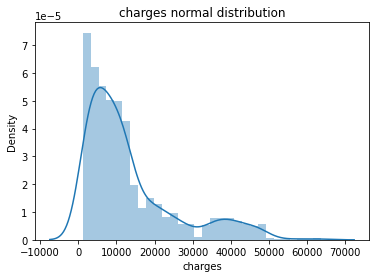

In [13]:
for each in num_cols:
    sns.distplot(data[each])
    plt.title(each + " normal distribution")
    plt.xlabel(each)
    plt.show()

a few gausian distributions as well as right skewed ones

In [10]:
#categoric values distinct value count
for each in cat_cols:
    print(f"{each} :--> {len(data[each].unique())}")

sex :--> 2
smoker :--> 2
region :--> 4


Lets check the distribution with seaborn's countplot method

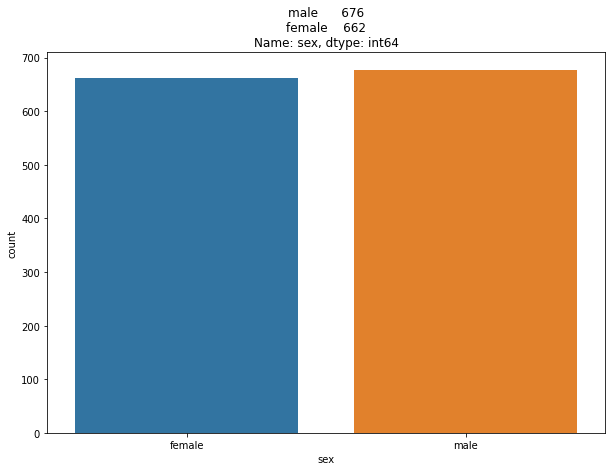

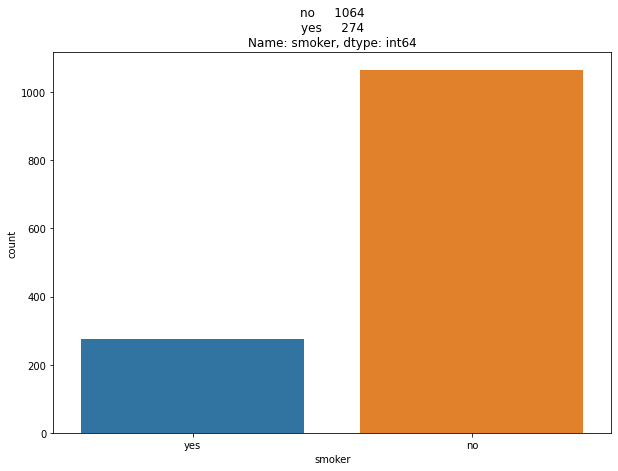

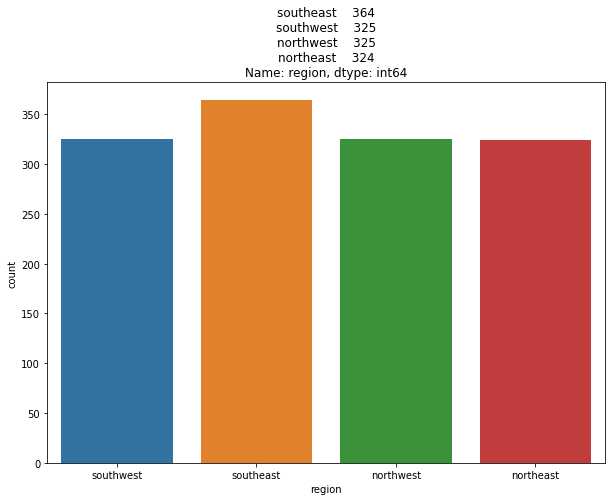

In [19]:
for each in cat_cols:
    count = data[each].value_counts()
    plt.figure(figsize = (10,7))
    sns.countplot(x = each, data = data)
    plt.title(str(count))
    plt.show()

we have some cat cols with few distinct vals, we will convert those to numeric data.

In [20]:

#categorical data coversion
for each in cat_cols:
    orderedIndex = data.groupby(each)['charges'].mean().sort_values().index
    count = data.groupby(each)['charges'].mean().count()
    print(orderedIndex, count, '/n')
    
    cat_num ={j:i for i, j in enumerate(orderedIndex, 0)}
    data[each] = data[each].map(cat_num)
    
    
data.head()

Index(['female', 'male'], dtype='object', name='sex') 2 /n
Index(['no', 'yes'], dtype='object', name='smoker') 2 /n
Index(['southwest', 'northwest', 'northeast', 'southeast'], dtype='object', name='region') 4 /n


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [21]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.543348,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130917,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


we see quite a number of outliers in our continuous attributes, and this could affect our models performance, we will rely on regularization techniques.

In [31]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.012027,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.014144,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.162590,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.035115,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.069008,0.787251
region,-0.012027,0.014144,0.162590,-0.035115,0.069008,1.000000,0.077042
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.077042,1.000000


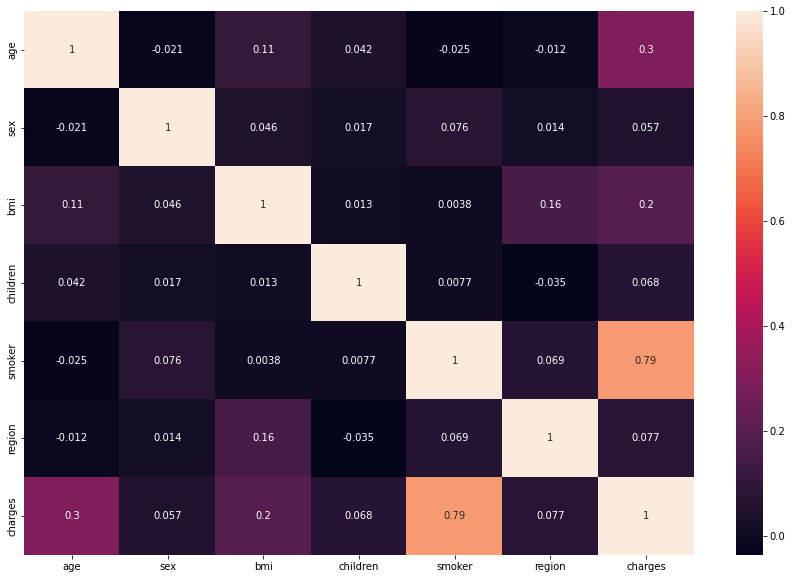

In [32]:
plt.figure(figsize = (15, 10))
sns.heatmap(data.corr(),annot = True)
plt.show()

from this we can at the very least establish the individuality of our attributes, 

In [33]:
x = data.corr()['charges'].sort_values(ascending = False)
x

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
region      0.077042
children    0.067998
sex         0.057292
Name: charges, dtype: float64

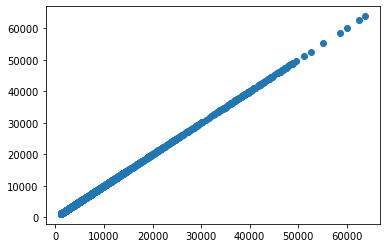

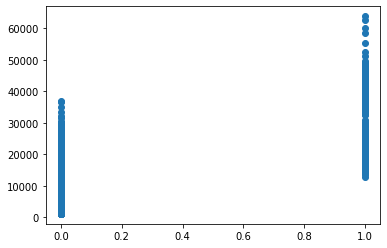

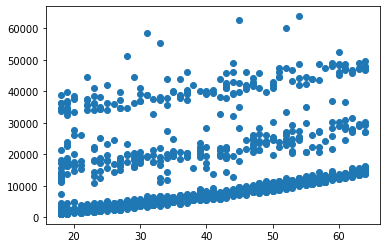

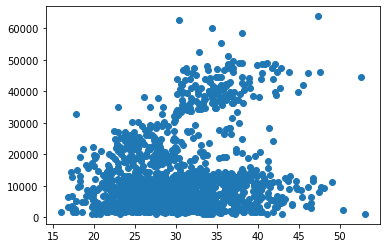

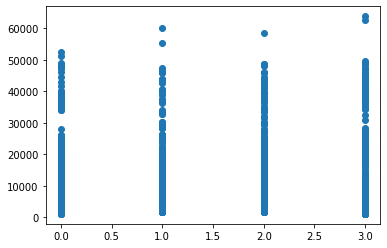

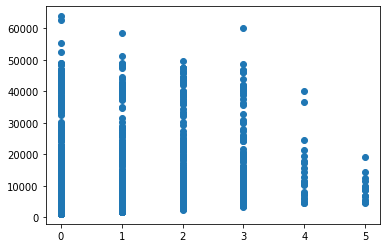

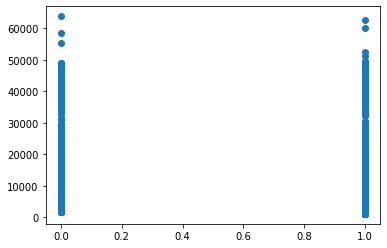

In [36]:
for each in x.index:
        plt.scatter(data[each], data['charges'])
        plt.show()

Linearity with some attributes appear to be a tricky one.

In [37]:
X = data.drop(['charges'], axis = 1)
Y = data['charges']


In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 97)

In [39]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1070, 6), (1070,), (268, 6), (268,))

Model Training and Building

In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [41]:
lr_predtrain = lr.predict(x_train)
print(lr_predtrain[:10])
print(y_train[:10])

[37360.53317233 12675.84767469 32967.0411769  10149.40084327
  3183.4676382  10370.98633261 12571.55217727 28680.1793522
 33402.92591057 30973.07821816]
860     46113.51100
114     11488.31695
725     40932.42950
627     11326.71487
200      2130.67590
165     10407.08585
920     13451.12200
30      35585.57600
617     23306.54700
1249    37607.52770
Name: charges, dtype: float64


In [42]:
#lets chekc with our metrics
r2error = metrics.r2_score(y_train, lr_predtrain)
mae = metrics.mean_absolute_error(y_train, lr_predtrain)
mse = metrics.mean_squared_error(y_train, lr_predtrain)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.7590343816907137
Root mean squared error is 5951.837138670421
mean squared error is 35424365.325256504
 Mean absolute error 4134.6723011331405


 This looks too good to be true; despite the likelihood of it being right . lets confirm with a grapic of predictions

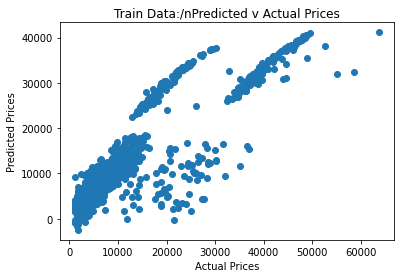

In [43]:
plt.scatter(y_train, lr_predtrain)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Train Data:/nPredicted v Actual Prices")
plt.show()

In [44]:
lr_testPred = lr.predict(x_test)
print(lr_testPred[:10])
print(y_test[:10])

[13682.37619056 16448.24436889 15024.49123831 11503.83442937
 10767.44572063 30226.19521702  6942.95228667 11083.28279405
 14512.23460931  9466.7946715 ]
27      12268.63225
997     13887.96850
162     10450.55200
824     12523.60480
392      8964.06055
207     20984.09360
647      8252.28430
661     22192.43711
1071    13974.45555
744      8827.20990
Name: charges, dtype: float64


In [50]:
r2error = metrics.r2_score(y_test, lr_testPred)
mae = metrics.mean_absolute_error(y_test, lr_testPred)
mse = metrics.mean_squared_error(y_test, lr_testPred)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.7090183102976988
Root mean squared error is 6488.1068972445955
mean squared error is 42095531.11007289
 Mean absolute error 4299.649065768976


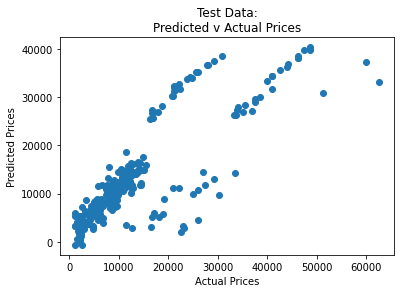

In [49]:
plt.scatter(y_test, lr_testPred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Test Data:\nPredicted v Actual Prices")
plt.show()

Notice the slight variation between our predictions and our actual values

### Lasso Regression; 
a regularization technique

In [51]:
lasso_model  =  Lasso()
lasso_model.fit(x_train, y_train)

Lasso()

In [52]:
lm_pred = lasso_model.predict(x_train)


In [53]:
print(lm_pred[:10])
print(y_train[:10])

[37349.74433139 12678.40616896 32958.96840706 10153.61392569
  3182.69144344 10373.089038   12570.38902294 28676.07568175
 33398.1219367  30970.32289971]
860     46113.51100
114     11488.31695
725     40932.42950
627     11326.71487
200      2130.67590
165     10407.08585
920     13451.12200
30      35585.57600
617     23306.54700
1249    37607.52770
Name: charges, dtype: float64


In [54]:
r2error = metrics.r2_score(y_train, lm_pred)
mae = metrics.mean_absolute_error(y_train, lm_pred)
mse = metrics.mean_squared_error(y_train, lm_pred)
rmse = np.sqrt(mse)

print(f'R squared error is {r2error}\nRoot mean squared error is {rmse}\nmean squared error is {mse}\n Mean absolute error {mae}')

R squared error is 0.7590342944905686
Root mean squared error is 5951.838215589649
mean squared error is 35424378.14455337
 Mean absolute error 4134.991833695447


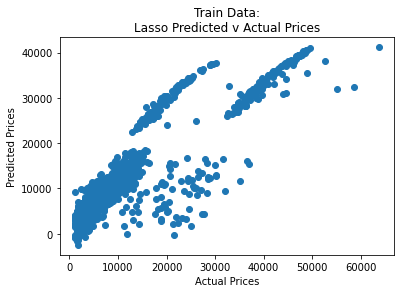

In [55]:
plt.scatter(y_train, lm_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Train Data:\nLasso Predicted v Actual Prices")
plt.show()

In [117]:
#notice how compact we have our graphics rendered.

In [56]:
lm_pred2 = lasso_model.predict(x_test)

In [57]:
r2error = metrics.r2_score(y_test, lm_pred2)
mae = metrics.mean_absolute_error(y_test, lm_pred2)
mse = metrics.mean_squared_error(y_test, lm_pred2)
rmse = np.sqrt(mse)

print(f'''R squared error is {r2error}
Root mean squared error is {rmse}
mean squared error is {mse}
Mean absolute error {mae}
''')

R squared error is 0.7090194726749333
Root mean squared error is 6488.093938292967
mean squared error is 42095362.95211395
Mean absolute error 4299.966718835043



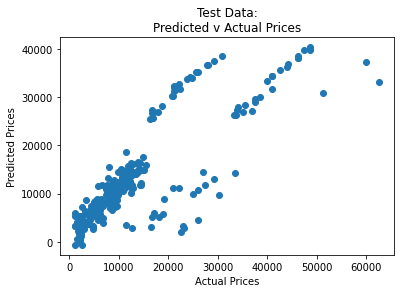

In [58]:
plt.scatter(y_test, lr_testPred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Test Data:\nPredicted v Actual Prices")
plt.show()